In [95]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline


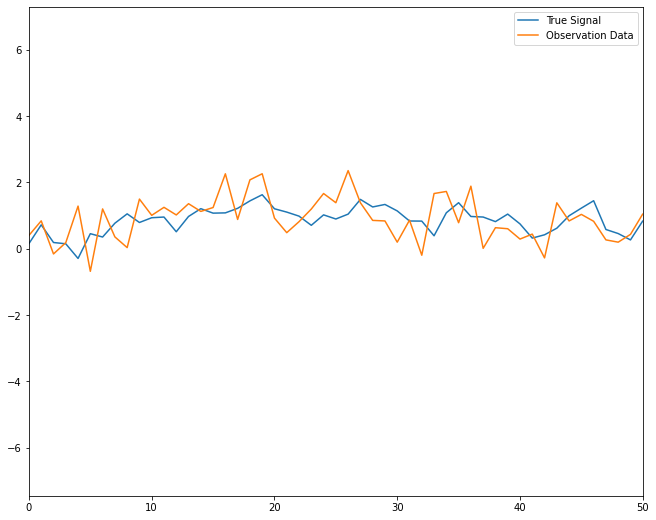

In [96]:
#Read the true signal
h = open('reference_signal.txt', 'r')

ground_truth_xs = []

for line in h:
    ground_truth_xs.append(float(line))

#Read the observation data
h = open('data.txt', 'r')

measurement_state = []

for line in h:
    measurement_state.append(float(line))

# Compare True Signal and Observation Data
plt.figure(figsize=(11, 9))
plt.plot(ground_truth_xs, label='True Signal')
plt.plot(measurement_state, label='Observation Data')
plt.legend()
plt.xlim(0,50)
plt.show()

The graph shows the true signal and the observation data.

## Kalman Filter

In [97]:
#Forecast formulas

def predict(A,B,mu_t,Sigma_t):
    predicted_mu = A * mu_t
    predicted_Sigma = A * Sigma_t * A + B
    
    return predicted_mu, predicted_Sigma

In [98]:
#Analysis formulas

def update(H, R, z, predicted_mu, predicted_Sigma):
    residual_mean = H * predicted_mu - z
    residual_covariance = H * predicted_Sigma * H + R
    kalman_gain = predicted_Sigma * H * residual_covariance
    updated_mu = predicted_mu - kalman_gain * residual_mean
    updated_Sigma = predicted_Sigma - kalman_gain * H * predicted_Sigma
    
    return updated_mu, updated_Sigma
    

In [99]:
#Convert the true signal into array
ground_truth_xs = np.asarray(ground_truth_xs)

In [100]:
#Initialize all the parameters
mu_0 = 0
Sigma_0 = 0.5**2

A = 0.99
B = 0.3**2
H = 1
R = 0.5**2
R1 = np.array([[0.5, 0],
              [0, 0.5]])

num_steps = 5000

measurement_states = []
filtered_states = []

mu_current = copy.copy(mu_0)
Sigma_current = copy.copy(Sigma_0)

for i in range(num_steps):
    predicted_mu, predicted_Sigma = predict(A, B, mu_current, Sigma_current)
    
    measurement_noise = np.random.multivariate_normal(mean=np.array([0,0]), cov=R1)
    new_measurement = H * ground_truth_xs[i] + measurement_noise
    
    mu_current, Sigma_current = update(H, R, new_measurement, predicted_mu, predicted_Sigma)
    
    measurement_states.append(new_measurement)
    filtered_states.append(mu_current)
    
measurement_states = np.array(measurement_states)
filtered_states = np.array(filtered_states) 


## Calculate the MSE for Kalman Filter

In [101]:
from statistics import mean

def mse(x1, x2):
    return mean((x1 - x2[:,0])**2)

mse(ground_truth_xs, filtered_states)

0.18486392134619645

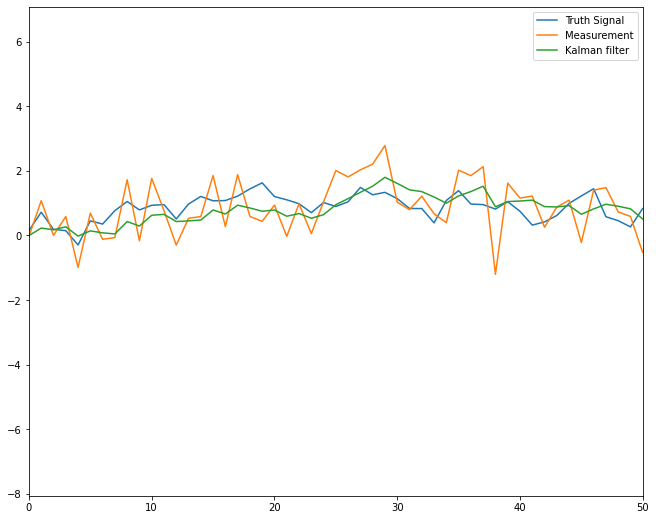

In [102]:
plt.figure(figsize=(11, 9))
plt.plot(ground_truth_xs)
plt.plot(measurement_states[:,0])
plt.plot(filtered_states[:,0])
plt.legend(['Truth Signal', 'Measurement', 'Kalman filter'])
plt.xlim(0,50)
plt.show()

The graph shows the difference between True signal, Measurement, and Kalman filter. True signal and Kalman filter shows similar pattern. They difference are not so much. 

## Ensemble Kalman Filter

In [103]:
C0 = 0.5**2 # **2 because std was given
m0 = 0

z_0 = np.random.normal(m0, C0)
m_0 = np.mean(z_0)

difference = z_0 - m_0
C_0 = np.mean((difference)**2)

In [104]:
#Convert array to list
ground_truth_xs = ground_truth_xs.tolist()

In [105]:
#Calculate MSE for Ensemble Kalman filter
def mse(x1, x2):
    return mean((x1 - x2)**2)

M is :  5
MSE :  0.002162302467993714
Final Mean:  -0.36155965115877625 and final Covariance:  0.14299764939009
M is :  10
MSE :  0.0013292999573505863
Final Mean:  -0.38847882520444327 and final Covariance:  0.14299764939008996
M is :  25
MSE :  0.000881114894740213
Final Mean:  -0.3795853001303479 and final Covariance:  0.14299764939009
M is :  50
5000
MSE :  0.0007198191273337015
Final Mean:  -0.376422689646097 and final Covariance:  0.14299764939009002


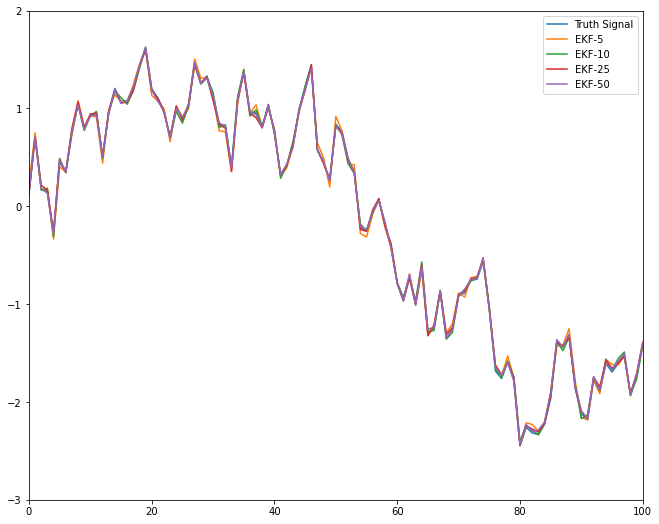

In [106]:
M = [5, 10, 25, 50]

filtered_states_5 = []
filtered_states_10 = []
filtered_states_25 = []
filtered_states_50 = []

for i in M:
    print("M is : ", i)
    
    for n in ground_truth_xs:
        e_n = np.random.normal(0, B, i)
        z_n = 0.99 * n + e_n
        
        n = z_n
        m_n = np.mean(z_n)
        
        if(i == 5):
            filtered_states_5.append(m_n)
        elif(i == 10):
            filtered_states_10.append(m_n)
        elif(i == 25):
            filtered_states_25.append(m_n)
        elif(i == 50):
            filtered_states_50.append(m_n)
        
        difference = e_n - z_n
        C_n = np.mean((difference)**2)
    
    if(i == 5):
        mse_result = mse(np.array(ground_truth_xs), np.array(filtered_states_5))
        print("MSE : ", mse_result)
    elif(i == 10):
        mse_result = mse(np.array(ground_truth_xs), np.array(filtered_states_10))
        print("MSE : ", mse_result)
    elif(i == 25):
        mse_result = mse(np.array(ground_truth_xs), np.array(filtered_states_25))
        print("MSE : ", mse_result)
    elif(i == 50):
        print(len(filtered_states_50))
        mse_result = mse(np.array(ground_truth_xs), np.array(filtered_states_50))
        print("MSE : ", mse_result)
    
    print("Final Mean: ", m_n, "and final Covariance: ", C_n)   
    
    
plt.figure(figsize=(11, 9))
plt.plot(ground_truth_xs)
plt.plot(filtered_states_5)
plt.plot(filtered_states_10)
plt.plot(filtered_states_25)
plt.plot(filtered_states_50)
plt.legend(['Truth Signal', 'EKF-5', 'EKF-10', 'EKF-25', 'EKF-50'])
plt.xlim(0,100)
plt.ylim(-3,2)
plt.show()